In [1]:
import numpy as np
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
from scipy.optimize import NonlinearConstraint
import pandas as pd

In [2]:
m = pd.read_csv("I(max).csv")
m = m.round({"v АК": 2, "v ЦН": 2})
# m=m*100
# m=m.astype(int)


def target_function(x, y):
    x = round(x, 2)
    y = round(y, 2)
    if x < 0.8:
        x = 0.8
    if x >2.8:
        x = 2.8
    if y < 0.8:
        y = 0.8
    if y >2.8:
        y =2.8
    while m.loc[(m["v АК"] == x) & (m["v ЦН"] ==y)].empty== True:
        x += 0.01
        y += 0.01
        x = round(x, 2)
        y = round(y, 2)
    return m.loc[(m["v АК"] == x) & (m["v ЦН"] == y)].iloc[0, 2]

In [3]:
# Bounded region of parameter space
pbounds = {"x": (0.8, 2.8), "y": (0.8, 2.8)}

optimizer = BayesianOptimization(
    f=target_function,
    pbounds=pbounds,
    verbose=0,  # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    allow_duplicate_points=False,
    random_state=1,
)

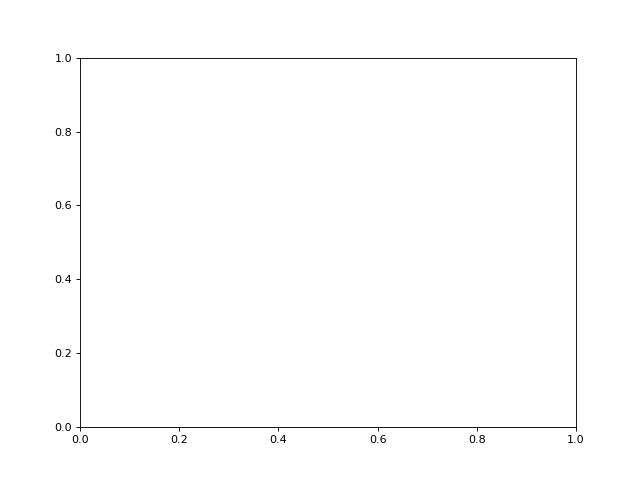

In [3]:
%matplotlib widget
fig = plt.figure(figsize=(8,6),dpi=80)
#projection='3d'
ax = plt.axes()

plt.rcParams["figure.autolayout"] = False

def update(frame,text_on,i):
    # updating the data by adding one more point
    from bayes_opt import UtilityFunction
    utility = UtilityFunction(kind="ei", kappa=2.56, xi=0)
    next_point = optimizer.suggest(utility)
    target = target_function(next_point.get("x"),next_point.get('y'))


    optimizer.register(params=next_point, target=target)
   # optimizer.maximize(init_points=0, n_iter=1)
    l=len(optimizer.res)-1
    #optimizer.probe([2,2],lazy=False)
    x1=optimizer.res[l].get("params").get('x')
    y1=optimizer.res[l].get("params").get('y')
    z1=optimizer.res[l].get("target")
    t=str(round(z1,3))
   
    
    
    ax.scatter(x1,y1,  alpha = 1,lw=2)  # creating new scatter chart with updated data
    #ax.scatter(optimizer.max.get('params').get('x'),optimizer.max.get('params').get('y'), color='red', alpha = 1,lw=7)
    ax.text(x1+0.01,y1+0.01,l, fontsize=12)
    #дорисовать линию меж точками
    if l>0:
        x0=optimizer.res[l-1].get("params").get('x')
        y0=optimizer.res[l-1].get("params").get('y')
        z0=optimizer.res[l-1].get("target")
        ax.plot([x0,x1],[y0,y1],lw=0.5,c="black")
    #ax.text(x1[len(x1)-1], y1[len(y1)-1], str(len(optimizer.res)), style='italic')
    if text_on==True:
        ax.text(x1,y1,t)
   # fig.canvas.draw()
    plt.savefig('frame/'+str(i)+'.jpg')

In [14]:
z=np.ndarray([200,200])
a=m['b'].to_numpy() 
for i in range(round(len(m)/200)):
    for k in range(200):
        z[k][i]=a[200*i+k]
X=np.linspace(m['v АК'].min(),m['v АК'].max(),200)
Y=np.linspace(m['v ЦН'].min(),m['v ЦН'].max(),200)

# Задаем сетку точек (x, y)
X, Y = np.meshgrid(X,Y)

# Отображаем поверхность
ax.pcolor(Y,X,z, cmap='turbo',alpha=1)
ax.set_xlabel('v AK')

# Можно также установить заголовки по осям Y и/или показать график
ax.set_ylabel('v ЦН')

200.0


Text(23.854166666666664, 0.5, 'v ЦН')

In [8]:
aaa=0

In [27]:
for i in range(150):
    aaa+=1
    update(fig, False,aaa)

In [ ]:
print(optimizer.res[len(optimizer.res)-1])

In [6]:
from bayes_opt import UtilityFunction

utility = UtilityFunction(kind="ucb", kappa=2.5, xi=0.0)
next_point_to_probe = optimizer.suggest(utility)
print("Next point to probe is:", next_point_to_probe)

Next point to probe is: {'x': 1.634044009405148, 'y': 2.240648986884316}


In [7]:
for _ in range(10):
    next_point = optimizer.suggest(utility)
    print(next_point)

    target = target_function(next_point.get("x"),next_point.get('y'))
    print(target)

    optimizer.register(params=next_point, target=target)
    
  #  print(target, next_point)
print(optimizer.max)

{'x': 0.8002287496346898, 'y': 1.4046651452636794}
0.1796568274436706
{'x': 2.8, 'y': 2.8}
0.14504166391574
{'x': 0.815384762857194, 'y': 1.413764662411718}
0.1796568274436706
{'x': 2.018130622837848, 'y': 0.8}
0.1403247589719872
{'x': 0.8, 'y': 2.519863636645687}
0.2160726449283818
{'x': 1.2026514719386672, 'y': 2.8}
0.2126168519481904
{'x': 0.8, 'y': 2.8}
0.215137801282488
{'x': 1.0732280782309565, 'y': 2.4924025421505323}
0.2145562052736861
{'x': 0.93973060992267, 'y': 2.6574819173196467}
0.2154702962925588
{'x': 0.8, 'y': 2.302142178930287}
0.2226067089196891
{'target': 0.2226067089196891, 'params': {'x': 0.8, 'y': 2.302142178930287}}
